# Anomaly Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

### Loading The Dataset

The `load_data(`) function shown below loads the data into the variables `X_train`, `X_val` and `y_val`.

- We will use `X_train` to fit a Gaussian distribution
- We will use `X_val` and `y_val` as a cross validation set to select a threshold and determine anomalous vs normal examples

In [3]:
#Loading the dataset
X_train, X_val, y_val = load_data()

### Viewing The Variables

In [4]:
#Displaying the first five elements of X_train

In [5]:
print("The first 5 elements of X_train are:\n", X_train[:5])

The first 5 elements of X_train are:
 [[13.04681517 14.74115241]
 [13.40852019 13.7632696 ]
 [14.19591481 15.85318113]
 [14.91470077 16.17425987]
 [13.57669961 14.04284944]]


In [6]:
# Display the first five elements of X_val
print("The first 5 elements of X_val are\n", X_val[:5])

The first 5 elements of X_val are
 [[15.79025979 14.9210243 ]
 [13.63961877 15.32995521]
 [14.86589943 16.47386514]
 [13.58467605 13.98930611]
 [13.46404167 15.63533011]]


In [7]:
# Display the first five elements of y_val
print("The first 5 elements of y_val are\n", y_val[:5])

The first 5 elements of y_val are
 [0 0 0 0 0]


### Checking the Dimensions of the Variables

In [8]:
print('The shape of X_train is:', X_train.shape)
print('The shape of X_val is:', X_val.shape)
print('The shape of y_val is: ', y_val.shape)

The shape of X_train is: (307, 2)
The shape of X_val is: (307, 2)
The shape of y_val is:  (307,)


### Visualising Our Data

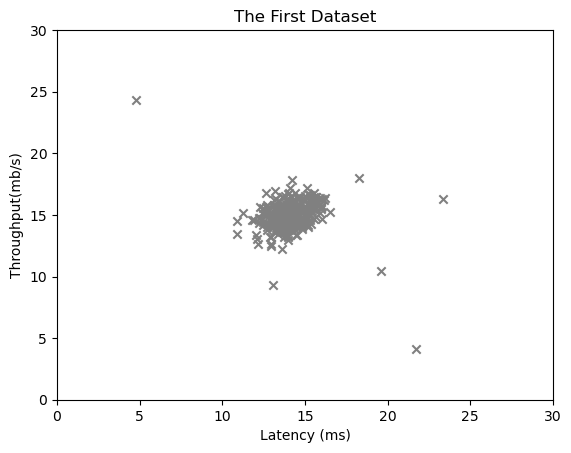

In [13]:
#Creating our scatter plot
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='grey')

#setting the title
plt.title("The First Dataset")
#setting the y-axis label
plt.ylabel('Throughput(mb/s)')
# Set the x-axis label
plt.xlabel('Latency (ms)')
# Set axis range
plt.axis([0, 30, 0, 30])
plt.show()

## Adding Gaussian Function

In [14]:
def estimate_gaussian(X):
    """
    Calculates mean and variance of all features 
    in the dataset
    
    Args:
        X (ndarray): (m, n) Data matrix
    
    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """

    m, n = X.shape

    mu = 1 / m * np.sum(X, axis=0)
    var = 1 / m * np.sum((X - mu) ** 2, axis=0)


    return mu, var

In [15]:
# Estimating mean and variance of each feature
from public_tests import *
mu, var = estimate_gaussian(X_train)

print("Mean of each feature:", mu)
print("Variance of each feature:", var)

# UNIT TEST
estimate_gaussian_test(estimate_gaussian)

Mean of each feature: [14.11222578 14.99771051]
Variance of each feature: [1.83263141 1.70974533]
All tests passed!


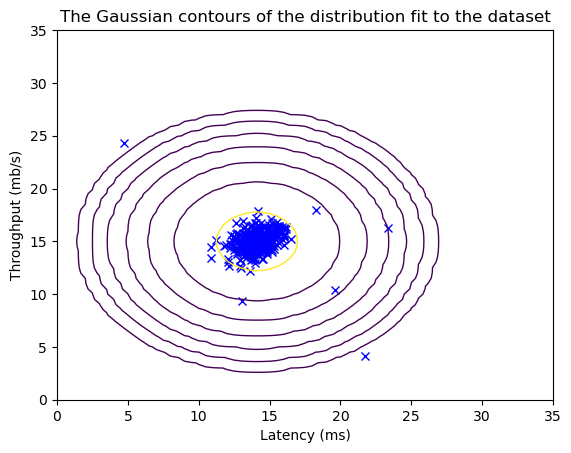

In [16]:
# Returns the density of the multivariate normal
# at each data point (row) of X_train
p = multivariate_gaussian(X_train, mu, var)

# Plotting code
visualize_fit(X_train, mu, var)

### Selecting the Threshold $\epsilon$

In [17]:
def select_threshold(y_val, p_val):
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """

    best_epsilon = 0
    best_F1 = 0
    F1 = 0

    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):

        
        predictions = (p_val < epsilon)
        tp = np.sum((predictions == 1) & (y_val == 1))
        fn = np.sum((predictions == 0) & (y_val == 1))
        fp = sum((predictions == 1) & (y_val == 0))
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = 2 * prec * rec / (prec + rec)

        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon

    return best_epsilon, best_F1

In [18]:
p_val = multivariate_gaussian(X_val, mu, var)
epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)

# UNIT TEST
select_threshold_test(select_threshold)

Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set: 0.875000
All tests passed!


/var/folders/4y/cdgg2mhs3474pdf_x3256qn00000gn/T/ipykernel_18554/3166453981.py:29: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)


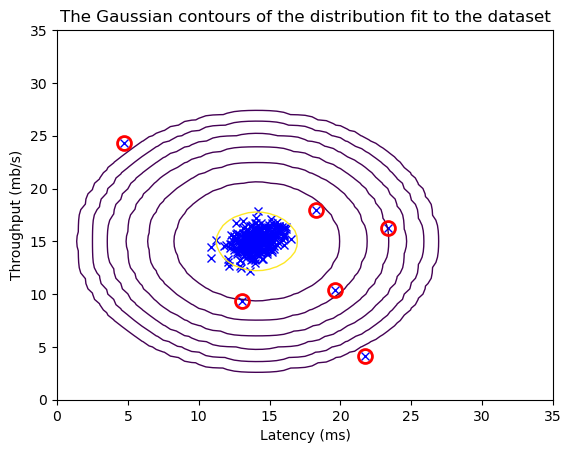

In [19]:
# Find the outliers in the training set
outliers = p < epsilon

# Visualize the fit
visualize_fit(X_train, mu, var)

# Draw a red circle around those outliers
plt.plot(X_train[outliers, 0], X_train[outliers, 1], 'ro',markersize= 10,markerfacecolor='none', markeredgewidth=2)

In [20]:
# load the dataset
X_train_high, X_val_high, y_val_high = load_data_multi()

In [21]:
print('The shape of X_train_high is:', X_train_high.shape)
print('The shape of X_val_high is:', X_val_high.shape)
print('The shape of y_val_high is: ', y_val_high.shape)

The shape of X_train_high is: (1000, 11)
The shape of X_val_high is: (100, 11)
The shape of y_val_high is:  (100,)


In [22]:
# Apply the same steps to the larger dataset

# Estimate the Gaussian parameters
mu_high, var_high = estimate_gaussian(X_train_high)

# Evaluate the probabilites for the training set
p_high = multivariate_gaussian(X_train_high, mu_high, var_high)

# Evaluate the probabilites for the cross validation set
p_val_high = multivariate_gaussian(X_val_high, mu_high, var_high)

# Find the best threshold
epsilon_high, F1_high = select_threshold(y_val_high, p_val_high)

print('Best epsilon found using cross-validation: %e' % epsilon_high)
print('Best F1 on Cross Validation Set:  %f' % F1_high)
print('# Anomalies found: %d' % sum(p_high < epsilon_high))

Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
# Anomalies found: 117


/var/folders/4y/cdgg2mhs3474pdf_x3256qn00000gn/T/ipykernel_18554/3166453981.py:29: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)
